**Prepare data for Analysis**

Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime

Access and save file path to a variable

In [2]:
location = "C:\\Users\\Administrator\\Documents\\projects\\google-data-analytics\\further-analysis\\*xlsx"
excel_files = glob.glob(location)

Merge excel files to a single dataframe

In [3]:
trip_data = pd.DataFrame()

for files in excel_files:
    df = pd.read_excel(files)
    trip_data = pd.concat([trip_data, df], ignore_index=True)

View and assess Dataframe

In [4]:
trip_data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,duration,day_of_week,ride_length
0,0DA46DD62F111D09,electric_bike,2021-04-01 00:03:18,2021-04-01 00:30:59,member,00:27:41,5,"0 days, 0:27:41"
1,FF009F812ADAFB3E,classic_bike,2021-04-01 00:03:47,2021-04-01 00:23:26,member,00:19:39,5,"0 days, 0:19:39"
2,623C22F8DEC21AE3,electric_bike,2021-04-01 00:04:12,2021-04-01 00:25:44,member,00:21:32,5,"0 days, 0:21:32"
3,8089677A9443153D,classic_bike,2021-04-01 00:04:59,2021-04-01 00:14:29,member,00:09:30,5,"0 days, 0:9:30"
4,B5DF5147C986AF69,electric_bike,2021-04-01 00:08:20,2021-04-01 00:25:52,member,00:17:32,5,"0 days, 0:17:32"


In [5]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5509830 entries, 0 to 5509829
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
 5   duration       object        
 6   day_of_week    int64         
 7   ride_length    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 336.3+ MB


In [6]:
# check for missing values
trip_data.isnull().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
duration         0
day_of_week      0
ride_length      0
dtype: int64

In [7]:
# check for duplicate entries
trip_data.duplicated().sum()

0

Observation
- Irrelevant Columns: 'duration'
- Incorrect datatype: 'ride_length'

Data Cleaning
- Drop 'duration' column
- Convert 'ride_length' from object to timedelta datatype
- Sort data by 'start_date'

In [8]:
# drop column
trip_data = trip_data.drop(columns=['duration'])

In [9]:
# arrange dataframe by start time
trip_data.sort_values(by:= ['started_at'], inplace=True)

In [10]:
# update index, and view dataset to confirm data cleaning steps
trip_data = trip_data.reset_index(drop=True)
trip_data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length
0,A3F8D895163BBB49,electric_bike,2021-01-01 00:02:05,2021-01-01 00:12:39,member,6,"0 days, 0:10:34"
1,0D139A3203274B87,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,member,6,"0 days, 0:6:15"
2,C7AE8E9CDB197A8E,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,member,6,"0 days, 0:19:41"
3,2633EB2B8A99F5CB,electric_bike,2021-01-01 00:12:13,2021-01-01 00:20:06,member,6,"0 days, 0:7:53"
4,6604F61AE4B14BC1,electric_bike,2021-01-01 00:12:49,2021-01-01 00:43:59,member,6,"0 days, 0:31:10"


In [11]:
# convert 'ride_length' to string, and from string to timedelta
trip_data.ride_length = trip_data.ride_length.astype('string')
trip_data.ride_length = pd.to_timedelta(trip_data.ride_length, unit= 'd', errors= 'coerce')

In [12]:
# confirm data type conversion
trip_data.dtypes

ride_id                   object
rideable_type             object
started_at        datetime64[ns]
ended_at          datetime64[ns]
member_casual             object
day_of_week                int64
ride_length      timedelta64[ns]
dtype: object

**Analyze Dataset**

In [13]:
# descriptive statistics
trip_data.describe()

,day_of_week,ride_length
count,5.509830e+06,5509830
mean,4.109992e+00,0 days 00:22:16.132847292
std,2.075020e+00,0 days 02:59:41.306369273
min,1.000000e+00,0 days 00:01:00
25%,2.000000e+00,0 days 00:06:57
50%,4.000000e+00,0 days 00:12:12
75%,6.000000e+00,0 days 00:22:01
max,7.000000e+00,38 days 20:24:09


Observation
- Maximum ride_length = 38 days

Study the Customers i.e; Casual Riders and Cyclistic Members, represented as Casual and Members respectively

In [15]:
# separate members from casuals
casual = trip_data[trip_data['member_casual'] =='casual']
member = trip_data[trip_data['member_casual'] == 'member']

In [16]:
# Calculate total rides taken as 'ride_count'. To idenify each group, use suffix '_m' for members, and '_c' for casual
ride_count_m = len(member.index)
ride_count_c = len(casual.index)

In [17]:
# create dataframe for visualization
df = {'Users':['Casual', 'Member'], 'total_ride':[ride_count_c, ride_count_m]}
ride_count = pd.DataFrame(df, index=[1,2])
ride_count

,Users,total_ride
1,Casual,2494892
2,Member,3014938


([<matplotlib.patches.Wedge at 0x207c23a31f0>,
 [Text(0.16248901849015793, 1.0879325893041836, 'Casual'),
  Text(-0.16248901849015807, -1.0879325893041836, 'Member')],
 [Text(0.08863037372190431, 0.5934177759841001, '45.28%  (2494892)'),
  Text(-0.08863037372190438, -0.5934177759841001, '54.72%  (3014938)')])

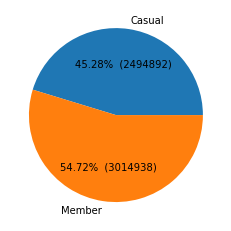

In [18]:
# plot chart
values = [ride_count_c, ride_count_m]
labels = ['Casual', 'Member']
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
    return my_autopct

plt.pie(values, labels = labels, autopct = make_autopct(values))

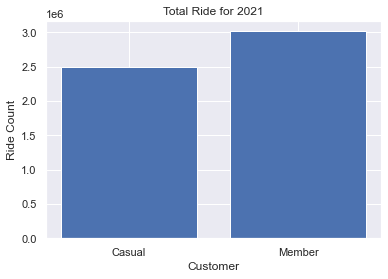

In [19]:
sns.set()
plt.bar(x = ride_count['Users'], height= ride_count['total_ride'])
plt.title('Total Ride for 2021')
plt.xlabel('Customer')
plt.ylabel('Ride Count')
plt.show()

Observation
- Number of rides for members is greater than number of rides for casual

In [20]:
# calculate for ride_length
ride_length_m = member['ride_length'].dt.total_seconds().sum()
ride_length_c = casual['ride_length'].dt.total_seconds().sum()

In [21]:
# create a dataframe for visualization
df1 = {'Users':['Casual', 'Member'], 'total_ride_length':[ride_length_c, ride_length_m]}
ride_length = pd.DataFrame(df1, index=[1, 2])
ride_length

,Users,total_ride_length
1,Casual,4.855078e+09
2,Member,2.506787e+09


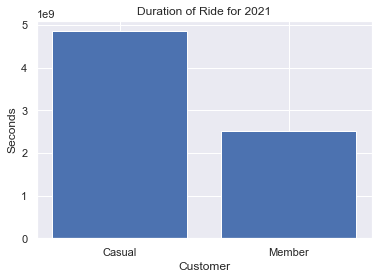

In [22]:
# plot chart
plt.bar(x = ride_length['Users'], height=ride_length['total_ride_length'])
plt.title('Duration of Ride for 2021')
plt.xlabel('Customer')
plt.ylabel('Seconds')
plt.show()

Observation
- Casuals have greater ride length than members

Examine Total rides and Average 'ride_length' on different timelines
- Use .resample() method to group the data into categories i.e Month, Day, Hour, and examine the total rides and average ride length for each category

### By month

In [23]:
# group data by month
total_rides_monthly_m = member.resample('M', on='started_at').count()
total_rides_monthly_m

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length
started_at,,,,,,,
2021-01-31,77573,77573,77573,77573,77573,77573,77573
2021-02-28,38685,38685,38685,38685,38685,38685,38685
2021-03-31,142375,142375,142375,142375,142375,142375,142375
2021-04-30,197477,197477,197477,197477,197477,197477,197477
2021-05-31,269897,269897,269897,269897,269897,269897,269897
2021-06-30,352676,352676,352676,352676,352676,352676,352676
2021-07-31,373833,373833,373833,373833,373833,373833,373833
2021-08-31,385426,385426,385426,385426,385426,385426,385426
2021-09-30,385959,385959,385959,385959,385959,385959,385959


In [24]:
# For average ride length, convert 'ride_length' data type from datetime to float, to use .resample() method
member['ride_length'] = member['ride_length'].dt.total_seconds()
avg_ride_length_monthly_m = member.resample('M', on='started_at').mean()
avg_ride_length_monthly_m

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4020\1190606177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member['ride_length'] = member['ride_length'].dt.total_seconds()


,day_of_week,ride_length
started_at,,
2021-01-31,4.186573,783.357276
2021-02-28,4.328577,1103.365413
2021-03-31,3.980221,850.140172
2021-04-30,4.085362,895.048709
2021-05-31,4.016147,893.618354
2021-06-30,4.002444,895.826101
2021-07-31,4.281374,868.846536
2021-08-31,3.903138,859.400212
2021-09-30,4.093445,837.134776


*Repeat for Casual riders*

In [25]:
# group data
total_rides_monthly_c = casual.resample('M', on='started_at').count()
total_rides_monthly_c

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length
started_at,,,,,,,
2021-01-31,17842,17842,17842,17842,17842,17842,17842
2021-02-28,9964,9964,9964,9964,9964,9964,9964
2021-03-31,83148,83148,83148,83148,83148,83148,83148
2021-04-30,134945,134945,134945,134945,134945,134945,134945
2021-05-31,253346,253346,253346,253346,253346,253346,253346
2021-06-30,365023,365023,365023,365023,365023,365023,365023
2021-07-31,435927,435927,435927,435927,435927,435927,435927
2021-08-31,407517,407517,407517,407517,407517,407517,407517
2021-09-30,359226,359226,359226,359226,359226,359226,359226


In [26]:
# find average ride_length 
casual['ride_length'] = casual['ride_length'].dt.total_seconds()
avg_ride_length_monthly_c = casual.resample('M', on='started_at').mean()
avg_ride_length_monthly_c

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4020\3633619148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual['ride_length'] = casual['ride_length'].dt.total_seconds()


,day_of_week,ride_length
started_at,,
2021-01-31,4.295987,1564.458581
2021-02-28,4.804697,3011.595042
2021-03-31,4.012532,2313.624200
2021-04-30,4.098870,2309.066842
2021-05-31,4.022420,2325.838715
2021-06-30,4.132767,2261.433323
2021-07-31,4.360572,1994.722626
2021-08-31,4.021692,1748.719622
2021-09-30,4.132880,1690.249283


In [32]:
# visually compare ride activity for casual and member riders each month

In [33]:
#  create dataframe for total monthly rides
df2 = total_rides_monthly_c.join(total_rides_monthly_m, lsuffix='c', rsuffix='m')
total_monthly_ride = df2[['ride_idc', 'ride_idm']]
total_monthly_ride.columns = ['Casual', 'Member']
total_monthly_ride['Month'] = total_monthly_ride.index.strftime('%b')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4020\983327320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_monthly_ride['Month'] = total_monthly_ride.index.strftime('%b')


<AxesSubplot:title={'center':'Total Ride per Month'}, xlabel='Month', ylabel='Number of Rides'>

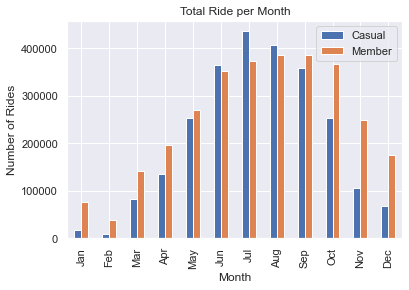

In [34]:
# plot chart
total_monthly_ride.plot(x= 'Month', y= ['Casual', 'Member'], ylabel= 'Number of Rides',  kind= 'bar',title= 'Total Ride per Month')

In [35]:
# create dataframe for average ride_length monthly
df3 = avg_ride_length_monthly_c.join(avg_ride_length_monthly_m, lsuffix='c', rsuffix='m')
avg_monthly_ride_length = df3[['ride_lengthc', 'ride_lengthm']]
avg_monthly_ride_length.columns = ['Casual', 'Member']
avg_monthly_ride_length['Month'] = avg_monthly_ride_length.index.strftime('%b')
avg_monthly_ride_length

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4020\2042147256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_monthly_ride_length['Month'] = avg_monthly_ride_length.index.strftime('%b')


,Casual,Member,Month
started_at,,,
2021-01-31,1564.458581,783.357276,Jan
2021-02-28,3011.595042,1103.365413,Feb
2021-03-31,2313.624200,850.140172,Mar
2021-04-30,2309.066842,895.048709,Apr
2021-05-31,2325.838715,893.618354,May
2021-06-30,2261.433323,895.826101,Jun
2021-07-31,1994.722626,868.846536,Jul
2021-08-31,1748.719622,859.400212,Aug
2021-09-30,1690.249283,837.134776,Sep


<AxesSubplot:title={'center':'Average Ride Time per Month'}, xlabel='Month', ylabel='Average'>

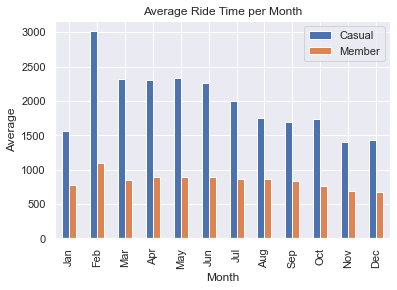

In [36]:
# plot chart
avg_monthly_ride_length.plot(x= 'Month', y= ['Casual', 'Member'], ylabel='Average', title= 'Average Ride Time per Month', kind= 'bar')

### By day

In [37]:
# Map each day of the week to the values on 'day_of_week' column
days = {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}
member['weekday'] = member['day_of_week'].map(days)
member

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4020\414366522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member['weekday'] = member['day_of_week'].map(days)


,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length,weekday
0,A3F8D895163BBB49,electric_bike,2021-01-01 00:02:05,2021-01-01 00:12:39,member,6,634.0,Friday
1,0D139A3203274B87,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,member,6,375.0,Friday
2,C7AE8E9CDB197A8E,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,member,6,1181.0,Friday
3,2633EB2B8A99F5CB,electric_bike,2021-01-01 00:12:13,2021-01-01 00:20:06,member,6,473.0,Friday
4,6604F61AE4B14BC1,electric_bike,2021-01-01 00:12:49,2021-01-01 00:43:59,member,6,1870.0,Friday
...,...,...,...,...,...,...,...,...
5509817,395C0E813FE9E4F9,electric_bike,2021-12-31 23:53:59,2022-01-01 00:14:29,member,6,1230.0,Friday
5509820,85FA369DB8D9A6A7,electric_bike,2021-12-31 23:56:47,2022-01-01 00:07:53,member,6,666.0,Friday
5509822,062FDD7B5E7D35AB,electric_bike,2021-12-31 23:57:47,2022-01-01 00:24:36,member,6,1609.0,Friday
5509824,30ED40455D8B7F3E,electric_bike,2021-12-31 23:57:59,2022-01-01 00:08:43,member,6,644.0,Friday


In [38]:
# group total ride by weekday
total_rides_daily_m = member.groupby('weekday').count()
total_rides_daily_m

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length
weekday,,,,,,,
Friday,438997,438997,438997,438997,438997,438997,438997
Monday,409354,409354,409354,409354,409354,409354,409354
Saturday,425175,425175,425175,425175,425175,425175,425175
Sunday,369218,369218,369218,369218,369218,369218,369218
Thursday,444440,444440,444440,444440,444440,444440,444440
Tuesday,458153,458153,458153,458153,458153,458153,458153
Wednesday,469601,469601,469601,469601,469601,469601,469601


In [39]:
# average ride_length by weekday
avg_ride_length_daily_m = member.groupby('weekday').mean()
avg_ride_length_daily_m

,day_of_week,ride_length
weekday,,
Friday,6.0,812.618765
Monday,2.0,807.753827
Saturday,7.0,932.376059
Sunday,1.0,956.580993
Thursday,5.0,778.404912
Tuesday,3.0,779.218495
Wednesday,4.0,781.145777


*Repeat for Casual riders*

In [40]:
# map and group data
days = {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}
casual['weekday'] = casual['day_of_week'].map(days)
total_rides_daily_c = casual.groupby('weekday').count()
total_rides_daily_c

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4020\3354484592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual['weekday'] = casual['day_of_week'].map(days)


,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length
weekday,,,,,,,
Friday,359117,359117,359117,359117,359117,359117,359117
Monday,282545,282545,282545,282545,282545,282545,282545
Saturday,550484,550484,550484,550484,550484,550484,550484
Sunday,474534,474534,474534,474534,474534,474534,474534
Thursday,282311,282311,282311,282311,282311,282311,282311
Tuesday,270713,270713,270713,270713,270713,270713,270713
Wednesday,275188,275188,275188,275188,275188,275188,275188


In [41]:
# averge ride length daily
avg_ride_length_daily_c = casual.groupby('weekday').mean()
avg_ride_length_daily_c

,day_of_week,ride_length
weekday,,
Friday,6.0,1845.723252
Monday,2.0,1938.104514
Saturday,7.0,2110.441846
Sunday,1.0,2284.853448
Thursday,5.0,1683.980366
Tuesday,3.0,1700.797269
Wednesday,4.0,1681.783007


In [42]:
# visually compare casual and member total ride and average ride length daily

In [43]:
# create data frame for total rides
df4 = total_rides_daily_c.join(total_rides_daily_m, lsuffix='_c', rsuffix='_m')
total_daily_rides = df4[['ride_id_c', 'ride_id_m']]
total_daily_rides.columns = ['Casual', 'Member']
total_daily_rides= total_daily_rides.reset_index()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_daily_rides['weekday'] = pd.Categorical(total_daily_rides['weekday'], categories=weekdays, ordered=True)
total_daily_rides = total_daily_rides.sort_values('weekday')
total_daily_rides = total_daily_rides.reset_index(drop=True)
total_daily_rides

,weekday,Casual,Member
0,Monday,282545,409354
1,Tuesday,270713,458153
2,Wednesday,275188,469601
3,Thursday,282311,444440
4,Friday,359117,438997
5,Saturday,550484,425175
6,Sunday,474534,369218


<AxesSubplot:title={'center':'Total Ride per Day'}, xlabel='weekday', ylabel='Number of Rides'>

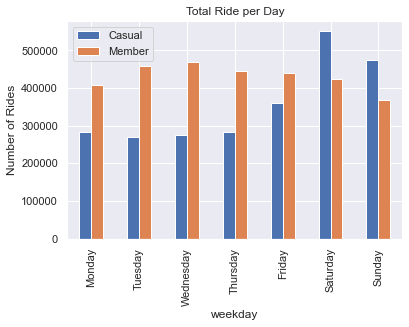

In [44]:
# plot chart
total_daily_rides.plot(x= 'weekday', y= ['Casual', 'Member'], ylabel = 'Number of Rides', title= 'Total Ride per Day', kind='bar')

In [45]:
# create dataframe for average ride length 
df5 = avg_ride_length_daily_c.join(avg_ride_length_daily_m, lsuffix='_c', rsuffix='_m')
avg_daily_ride_length = df5[['ride_length_c', 'ride_length_m']]
avg_daily_ride_length.columns = ['Casual', 'Member']
avg_daily_ride_length = avg_daily_ride_length.reset_index()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_daily_ride_length['weekday'] = pd.Categorical(avg_daily_ride_length['weekday'], categories=weekdays, ordered=True)
avg_daily_ride_length = avg_daily_ride_length.sort_values('weekday')
avg_daily_ride_length = avg_daily_ride_length.reset_index(drop=True)
avg_daily_ride_length

,weekday,Casual,Member
0,Monday,1938.104514,807.753827
1,Tuesday,1700.797269,779.218495
2,Wednesday,1681.783007,781.145777
3,Thursday,1683.980366,778.404912
4,Friday,1845.723252,812.618765
5,Saturday,2110.441846,932.376059
6,Sunday,2284.853448,956.580993


<AxesSubplot:title={'center':'Average Ride Length per Day'}, xlabel='weekday', ylabel='Average'>

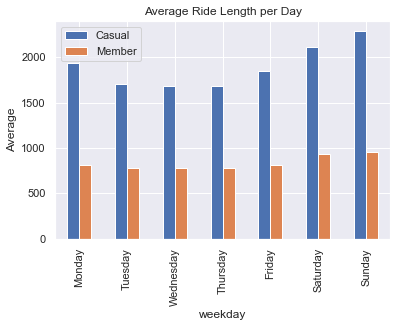

In [46]:
# plot chart
avg_daily_ride_length.plot(x= 'weekday', y=['Casual', 'Member'], ylabel= 'Average', title= 'Average Ride Length per Day', kind='bar')

### By Hour
To group dataframe by hour of the day;
- round up 'started_at' column to the hour each ride started, and save to a new column 'start_hour'. Use .groupby() method to group dataframe by 'start_hour'. 
- calculate total rides and average ride_length each hour

In [47]:
# round up 'start_hour' and group by each hour of the day
member['start_hour'] = pd.DatetimeIndex(pd.to_datetime(member['started_at']).round('1h')).time 
total_ride_hourly_m = member.groupby('start_hour').count()
total_ride_hourly_m

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4020\1865360560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member['start_hour'] = pd.DatetimeIndex(pd.to_datetime(member['started_at']).round('1h')).time


,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length,weekday
start_hour,,,,,,,,
00:00:00,40678,40678,40678,40678,40678,40678,40678,40678
01:00:00,26019,26019,26019,26019,26019,26019,26019,26019
02:00:00,16869,16869,16869,16869,16869,16869,16869,16869
03:00:00,8717,8717,8717,8717,8717,8717,8717,8717
04:00:00,6769,6769,6769,6769,6769,6769,6769,6769
05:00:00,13135,13135,13135,13135,13135,13135,13135,13135
06:00:00,51904,51904,51904,51904,51904,51904,51904,51904
07:00:00,113650,113650,113650,113650,113650,113650,113650,113650
08:00:00,170289,170289,170289,170289,170289,170289,170289,170289


In [48]:
# calculate average 'ride_length' each hour
avg_ride_length_hourly_m = member.groupby('start_hour').mean()
avg_ride_length_hourly_m

,day_of_week,ride_length
start_hour,,
00:00:00,4.454275,842.508358
01:00:00,4.035628,858.859756
02:00:00,4.139190,939.805501
03:00:00,3.778135,977.409315
04:00:00,3.957453,896.415128
05:00:00,3.916559,844.927522
06:00:00,3.998940,725.173031
07:00:00,3.992538,736.808297
08:00:00,4.018956,749.616763


*Repeat for Casual riders*

In [49]:
# round up and group data for total rides each hour
casual['start_hour'] = pd.DatetimeIndex(pd.to_datetime(casual['started_at']).round('1h')).time 
total_ride_hourly_c = casual.groupby('start_hour').count()
total_ride_hourly_c

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4020\1103182359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual['start_hour'] = pd.DatetimeIndex(pd.to_datetime(casual['started_at']).round('1h')).time


,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length,weekday
start_hour,,,,,,,,
00:00:00,62343,62343,62343,62343,62343,62343,62343,62343
01:00:00,44848,44848,44848,44848,44848,44848,44848,44848
02:00:00,32796,32796,32796,32796,32796,32796,32796,32796
03:00:00,18242,18242,18242,18242,18242,18242,18242,18242
04:00:00,11146,11146,11146,11146,11146,11146,11146,11146
05:00:00,9659,9659,9659,9659,9659,9659,9659,9659
06:00:00,17202,17202,17202,17202,17202,17202,17202,17202
07:00:00,34443,34443,34443,34443,34443,34443,34443,34443
08:00:00,56522,56522,56522,56522,56522,56522,56522,56522


In [50]:
# calculate for average ride_length each hour
avg_ride_length_hourly_c = casual.groupby('start_hour').mean()
avg_ride_length_hourly_c

,day_of_week,ride_length
start_hour,,
00:00:00,4.419855,2142.595993
01:00:00,3.870540,2091.992486
02:00:00,4.015856,2500.435693
03:00:00,3.596535,2797.687644
04:00:00,3.777140,2635.811771
05:00:00,3.663009,2145.464230
06:00:00,3.977270,1374.558947
07:00:00,4.007055,1327.763784
08:00:00,4.042267,1308.825325


In [51]:
# visually compare casual and member total rides and average ride length each hour

In [52]:
# create dataframe for total rides
df6 = total_ride_hourly_c.join(total_ride_hourly_m, lsuffix='_c', rsuffix='_m')
total_ride_hourly = df6[['ride_id_c', 'ride_id_m']]
total_ride_hourly.columns = ['Casual', 'Member']
total_ride_hourly = total_ride_hourly.reset_index()
total_ride_hourly

,start_hour,Casual,Member
0,00:00:00,62343,40678
1,01:00:00,44848,26019
2,02:00:00,32796,16869
3,03:00:00,18242,8717
4,04:00:00,11146,6769
5,05:00:00,9659,13135
6,06:00:00,17202,51904
7,07:00:00,34443,113650
8,08:00:00,56522,170289
9,09:00:00,67700,150077


<AxesSubplot:title={'center':'Total Ride per Hour'}, xlabel='start_hour', ylabel='Number of Rides'>

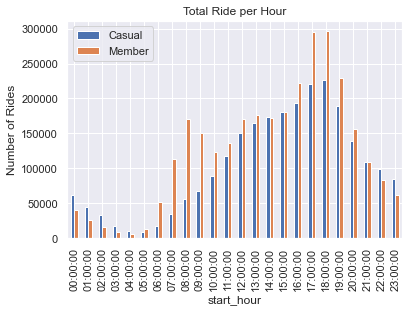

In [53]:
# plot chart
total_ride_hourly.plot(x='start_hour', y=['Casual', 'Member'], ylabel = 'Number of Rides', title= 'Total Ride per Hour', kind='bar')

In [54]:
# create dataframe for average ride length
df7 = avg_ride_length_hourly_c.join(avg_ride_length_hourly_m, lsuffix='_c', rsuffix='_m')
avg_hourly_ride_length = df7[['ride_length_c', 'ride_length_m']]
avg_hourly_ride_length.columns = ['Casual', 'Member']
avg_hourly_ride_length = avg_hourly_ride_length.reset_index()
avg_hourly_ride_length.dtypes

start_hour     object
Casual        float64
Member        float64
dtype: object

<AxesSubplot:title={'center':'Average Ride Length per Hour'}, xlabel='start_hour', ylabel='Average'>

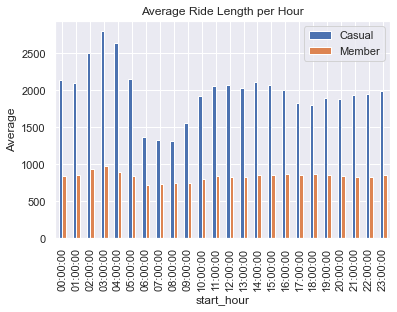

In [55]:
# plot chart
avg_hourly_ride_length.plot(x= 'start_hour', y= ['Casual', 'Member'], ylabel= 'Average', title= 'Average Ride Length per Hour',kind='bar')

Examine 'rideable_type' for member and casual riders

In [56]:
# use .groupby() method to group rides by 'rideable_type'
preferred_ride_m = member.groupby('rideable_type').count()
preferred_ride_m

,ride_id,started_at,ended_at,member_casual,day_of_week,ride_length,weekday,start_hour
rideable_type,,,,,,,,
classic_bike,1955673,1955673,1955673,1955673,1955673,1955673,1955673,1955673
docked_bike,1,1,1,1,1,1,1,1
electric_bike,1059264,1059264,1059264,1059264,1059264,1059264,1059264,1059264


*Repeat for Casual riders*

In [57]:
preferred_ride_c = casual.groupby('rideable_type').count()
preferred_ride_c

,ride_id,started_at,ended_at,member_casual,day_of_week,ride_length,weekday,start_hour
rideable_type,,,,,,,,
classic_bike,1253395,1253395,1253395,1253395,1253395,1253395,1253395,1253395
docked_bike,310390,310390,310390,310390,310390,310390,310390,310390
electric_bike,931107,931107,931107,931107,931107,931107,931107,931107


In [58]:
#  create dataframe for visualization
df8 = preferred_ride_c.join(preferred_ride_m, lsuffix='_c', rsuffix='_m')
preferred_ride = df8[['ride_id_c', 'ride_id_m']]
preferred_ride.columns = ['Casual', 'Member']
preferred_ride = preferred_ride.reset_index()
preferred_ride

,rideable_type,Casual,Member
0,classic_bike,1253395,1955673
1,docked_bike,310390,1
2,electric_bike,931107,1059264


<AxesSubplot:title={'center':'Preferred Ride'}, xlabel='rideable_type', ylabel='Number of Rides'>

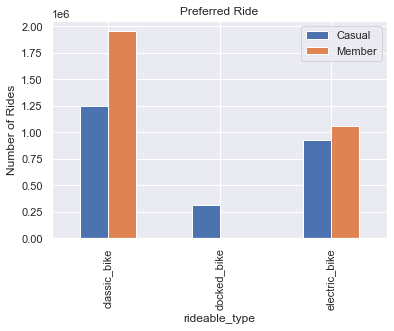

In [59]:
# plot chart
preferred_ride.plot(x= 'rideable_type', y= ['Casual', 'Member'], ylabel= 'Number of Rides', title= 'Preferred Ride', kind= 'bar')

Save dataframe for visualizations in tableau

In [60]:
ride_count.to_csv('C://Users//Administrator//Documents//My Tableau Repository//Datasources//riders.csv')

In [62]:
total_monthly_ride.to_csv('C://Users//Administrator//Documents//My Tableau Repository//Datasources//month.csv')

In [63]:
total_daily_rides.to_csv('C://Users//Administrator//Documents//My Tableau Repository//Datasources//day.csv')

In [64]:
total_ride_hourly.to_csv('C://Users//Administrator//Documents//My Tableau Repository//Datasources//hour.csv')